# Problem

$\blacktriangleright$ Here we solve a multiphysics problem through the one-way coupling of the incompressible Navier-Stokes equation and a time-dependent advection-diffusion problem for the concentration of a chemical specie in the domain. The adopted schemes are _Backward Euler_ (BE) in time while _Galerkin_ one in space

1. The full problem in strong form reads
$$
\begin{equation}
    \begin{cases}
        \frac{\partial u}{\partial t}-\text{div}(\nu(\nabla u + \nabla u^T)) + (u\cdot \nabla)u +\nabla p=0 &\qquad in \thinspace \Omega \times (0,T)\\
        \text{div}u=0 &\qquad in \thinspace \Omega \times (0,T)\\
        \frac{\partial c}{\partial t} -k\Delta c + u\cdot \nabla c =0 &\qquad in \thinspace \Omega \times (0,T)\\
        u=0,p=0 &\qquad in \thinspace \Omega, t=0\\
        u=10y(0.2-y) &\qquad on \thinspace \Gamma_{in}\\
        (2\nu D(u)-pI)\cdot \hat{n}=0 &\qquad on \thinspace \Gamma_{out}\\
        u=0 &\qquad on \thinspace \Gamma_{walls}\\
        c=1 &\qquad in \thinspace \Omega,t=0\\
        c=0 &\qquad on \thinspace \Gamma_{in}\\
        \nabla_n c=0 &\qquad on \thinspace \Gamma_{walls}\\
    \end{cases}
\end{equation}
$$
Here, the velocity field calculated by means of the NS equation enters as the advective field in the transport term for the concentration equation of species. Then we have a parabolic inlet profile for the fluid velocity, a homogeneous Neumann condition, i.e. outflow conditions for the fluid, just like for the concentration. The fluid is initially stagnant. The problem will be solved employing the _Incremental Chorin-Theman_ splitting procedure.

2. Incremental Chorin-Theman procedure for both velocity and pressure for the NS equation, while the equation for the concentration is discretised using classical BE and Galerkin</br>

$\bullet$ step 1
$$\begin{equation}
    \begin{cases}
        \frac{\tilde{u}-u^n}{\Delta t}-2\nu D(\tilde{u}) + (u^n\cdot\nabla)\tilde{u}=-\nabla p^{n} &\qquad in \thinspace \Omega\\
        \tilde{u}=0 &\qquad on \thinspace \Gamma_{walls}\\
        \tilde{u}=10y(0.2-y)  &\qquad on \thinspace \Gamma_{in}\\
        2\nu D(\tilde{u})\cdot \hat{n}=0 &\qquad on \thinspace \Gamma_{out}\\
    \end{cases}
\end{equation}$$
$\bullet$ step 2
\begin{equation}
    \begin{cases}
        -\Delta \delta p =-\frac{1}{\Delta t}\text{div}\tilde{u} &\qquad in \thinspace \Omega\\
        \delta p =0 &\qquad on \thinspace \Gamma_{out}\\
        \nabla \delta p \cdot \hat{n}=0 &\qquad on \thinspace \partial \Omega/\Gamma_{out}
    \end{cases}
\end{equation}
$\bullet$ step 3
\begin{equation}
    \begin{cases}
    u^{n+1}=\tilde{u}-\Delta t\nabla \delta p\\
    p^{n+1}=p^n +\delta p
\end{cases}
\end{equation}
$\bullet$ step 4
\begin{equation}
        \frac{c^{n+1}-c^n}{\Delta t} -k\Delta c^{n+1} +u^{n+1}\cdot \nabla c^{n+1}=0
\end{equation}

3. The adopted functional spaces are </br>

$\ast$ for the velocity field
$$V_0=[H^1_{\partial\Omega / \Gamma_{out}}(\Omega)]^2$$
$$V_D=\{v\in [H^1(\Omega)]^2: v\vert_{\Gamma_{walls}}=0,\thinspace v\vert_{\Gamma{in}}=g\}$$
$\ast$ for the pressure field
$$Q\in [H^1_{\Gamma_{out}}(\Omega)]^2$$
$\ast$ for the concentration field that is a scalar just like the pressure one
$$Z_0={[H^1_{\partial\Omega/\Gamma_{in}}(\Omega)}]^2$$
$$Z_D=\{w\in [H^1(\Omega)]^2: w\vert_{\Gamma_{in}}=0\}$$

4. Weak formulation of the problem</br>

$\blacktriangleright$ step 1
\begin{align}
    \frac{1}{\Delta t}\int_{\Omega}\tilde{u}vd\Omega +2\nu\int_{\Omega}D( \tilde{u}):D(v)d\Omega +\int_{\Omega}(u^n\cdot\nabla)\tilde{u}vd\Omega=-\int_{\Omega}\nabla p^n vd\Omega \\ +\frac{1}{\Delta t}\int_{\Omega}u^n v d\Omega
\end{align}
$\blacktriangleright$ step 2
\begin{align}
    \int_{\Omega}\nabla \delta p:\nabla q d\Omega = -\frac{1}{\Delta t}\int_{\Omega}\text{div}\tilde{u}qd\Omega
\end{align}
$\blacktriangleright$ step 3
\begin{align}
    \int_{\Omega}u^{n+1}vd\Omega=\int_{\Omega}\tilde{u}vd\Omega -\Delta t\int_{\Omega}\nabla\delta p v d\Omega
\end{align}
$\blacktriangleright$ step 4
\begin{align}
    \frac{1}{\Delta t}\int_{\Omega} c^{n+1}wd\Omega +\int_{\Omega}k\nabla c^{n+1}:\nabla w d\Omega +\int_{\Omega}u^{n+1}\cdot \nabla c^{n+1}wd\Omega=\frac{1}{\Delta t}\int_{\Omega}c^nwd\Omega
\end{align}
what should be noticed here is that in the concentration equation the velocity field enters at the $u^{n+1}$ iteration that could be initially perceived as non-linear while on the contrary is not, since the velocity profile is already calculated from the NS equation

5. Bonus </br>
The full system can be solved as a full non-linear problem avoiding the splitting procedure using SNES that will automatically linearize the problem using specified Newton solvers, but in this case the time needed for the solution of N-linear-systems (needed at each time-step) will be huge comparaed to the extreme simplification introduced by the Incremental-Chorin-Theman procedure, that instead solves only three linear systems (for the NS equation) plus one for the concentration equation.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
try:
    import firedrake
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/firedrake-install-release-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
    import firedrake

--2025-05-18 14:32:30--  https://fem-on-colab.github.io/releases/firedrake-install-release-real.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4767 (4.7K) [application/x-sh]
Saving to: ‘/tmp/firedrake-install.sh’

/tmp/firedrake-inst 100%[===================>]   4.66K  --.-KB/s    in 0s      

2025-05-18 14:32:31 (54.3 MB/s) - ‘/tmp/firedrake-install.sh’ saved [4767/4767]

+ INSTALL_PREFIX=/usr/local
++ echo /usr/local
++ awk -F/ '{print NF-1}'
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FIREDRAKE_INSTALLED=/usr/local/share/fem-on-colab/firedrake.installed
+ [[ ! -f /usr/local/share/fem-on-colab/firedrake.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/a51d

---

Setup environment and output path

In [ ]:
from firedrake import *
import matplotlib.pyplot as plt
import numpy as np

from firedrake.petsc import PETSc

In [ ]:
# Get current path: all relative paths that you may use for input/output start from here.
#
# - Colab:  The default path is /content, and your GDrive folder is accessible (if mounted) at /content/drive/MyDrive
#
# - local:  If running on your local machine, current_path is the position WHERE YOU LAUNCHED THE NOTEBOOK KERNEL BY 'jupyter notebook'
#           and NOT the directory in which this ipynb file is saved.
#           If you want to modify your current path, go to the terminal, stop the kernel (ctrl-C + press y), then move to the desired path by
#           cd my/desired/path/starting/from/here
#           and then launch 'jupyter notebook'.
import os
current_path = os.getcwd()
print(current_path)

basename = '...'
outfileU = File("/content/drive/MyDrive/velocity1.pvd")
outfileP = File("/content/drive/MyDrive/pressure1.pvd")
outfileC = File("/content/drive/MyDrive/concentration1.pvd")


/content


/usr/local/lib/python3.11/dist-packages/firedrake/_deprecation.py:65: UserWarning: The use of `File` for output is deprecated, please update your code to use `VTKFile` from `firedrake.output`.
  warn(


---
---
# Exercise

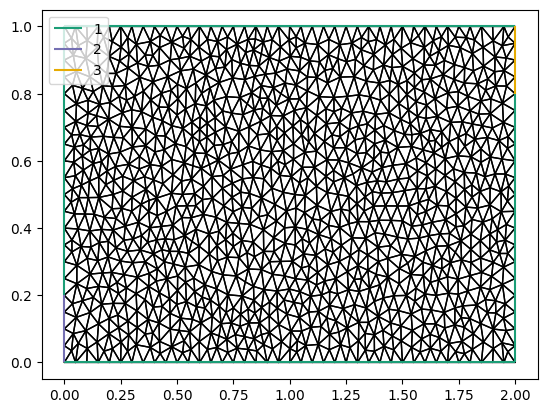

In [ ]:
# Import mesh: set the path correctly!
mesh = Mesh('/content/drive/MyDrive/meshes/pool.msh')
fig, ax = plt.subplots()
triplot(mesh, axes=ax)
ax.legend(loc='upper left')

### FE spaces, data, BCs

In [ ]:
# Function spaces
V=VectorFunctionSpace(mesh,'P',2)
Q=FunctionSpace(mesh,'P',1)
R=FunctionSpace(mesh,'P',1)

# Data
nu = 0.01
k = 1e-4
t = 0
Tf=10
dt=0.5
x = SpatialCoordinate(mesh)

u_in=as_vector((100*x[1]*(0.2-x[1]),0))
u_noslip=Constant((0,0))
p_diri=Constant(0)
c_in=Constant(0)

bc_noslip=DirichletBC(V,u_noslip,1)
bc_inlet=DirichletBC(V,u_in,2)
bc_pressure=DirichletBC(Q,p_diri,3)
bc_concentration=DirichletBC(R,c_in,2)
# Boundary conditions for the Chorin-Temam steps and the concentration problem
bcsU = (bc_noslip,bc_inlet)
bcsP = (bc_pressure)
bcsC = (bc_concentration)

### Initial condition

In [ ]:
uh_old = Function(V)
ph_old = Function(Q)
ch_old = Function(R)

"""uh_old.interpolate(Constant((0,0)))
ph_old.interpolate(Constant(0))
ch_old.interpolate(Constant(0))"""

'uh_old.interpolate(Constant((0,0)))\nph_old.interpolate(Constant(0))\nch_old.interpolate(Constant(0))'

### Post-processing

In [ ]:
# vtk output for Paraview
uh_old.rename("Velocity")   # this names will be used in Paraview
ph_old.rename("Pressure")
ch_old.rename("Concentration")


outfileU.write(uh_old)
outfileP.write(ph_old)
outfileC.write(ch_old)

# Compute mean concentration, given a concentration field ch
def mean_concentration(ch):
    return assemble(ch*dx)


### Variational forms for incremental Chorin-Temam steps and passive scalar problem

In the inputs:<br>
*u, dp, c* are trial functions,<br>
*v, q, w* are corresponding test functions,<br>
*dt* is the time step length $\Delta t$,<br>
the suffix *..._old* denotes variables evaluated at the **previous time step**,<br>
the suffix *..._tilde* denotes variables computed at a **previous sub-step**, but associated to the **current time-step**.<br>

In [ ]:
# Forms for step 1 (incremental Chorin-Temam)
def predictor_forms( utilde,v,uold,pold,dt,nu ):
    A=1/dt*inner(utilde,v)*dx\
      +2*nu*inner(sym(grad(utilde)),sym(grad(v)))*dx\
      +dot(dot(grad(utilde),uold),v)*dx

    L= 1/dt*dot(uold,v)*dx\
      -inner(grad(pold),v)*dx

    return A,L

# Forms for step 2 (incremental Chorin-Temam)
def pressure_forms( dp,q,utilde,dt ):
    A= inner(grad(dp),grad(q))*dx
    L= -1/dt*dot(div(utilde),q)*dx
    return A,L

# Forms for step 3 (incremental Chorin-Temam)
def projection_forms( u,v,utilde,dp,dt ):
    A=inner(u,v)*dx
    L=inner(utilde,v)*dx\
      -dt*inner(grad(dp),v)*dx
    return A,L

# Forms for concentration equation
def concentration_forms(c, psi, k, u, cold, dt):
    A= 1/dt*inner(c,psi)*dx\
      +k*inner(grad(c),grad(psi))*dx\
      +dot(dot(grad(c),u),psi)*dx
    L=1/dt*inner(cold,psi)*dx
    return A,L

### Definition of the steps of the solver

In [ ]:
# Trial and test functions
utilde=TrialFunction(V)
#u=TrialFunction(V)
dp=TrialFunction(Q)
c=TrialFunction(R)
v=TestFunction(V)
q=TestFunction(Q)
psi=TestFunction(R)

# Actual solution
uh = Function(V)
dph = Function(Q)       # incremental
ch = Function(R)

uh.interpolate(Constant((0,0)))
dph.interpolate(Constant(0))
ch.interpolate(Constant(1))

uh_old.assign(uh)
ph_old.assign(dph)
ch_old.assign(ch)

# Chorin-Temam step 1
a1, L1 = predictor_forms( utilde,v,uh_old,ph_old,dt,nu )
step1_pb = LinearVariationalProblem(a1, L1, uh, bcsU)
step1 = LinearVariationalSolver(step1_pb, solver_parameters={'ksp_type': 'preonly', 'pc_type':'lu'})

# Chorin-Temam step 2
a2, L2 = pressure_forms( dp,q,uh,dt )
step2_pb = LinearVariationalProblem(a2, L2, dph, bcsP)
step2 = LinearVariationalSolver(step2_pb, solver_parameters={'ksp_type': 'preonly', 'pc_type':'lu'})

# Chorin-Temam step 3
a3, L3 = projection_forms( utilde,v,uh,dph,dt )
step3_pb = LinearVariationalProblem(a3, L3, uh) # no BCs
step3 = LinearVariationalSolver(step3_pb, solver_parameters={'ksp_type': 'preonly', 'pc_type':'lu'})

# Step 4: Concentration problem
a4, L4 = concentration_forms(c, psi, k, uh, ch_old, dt)
concentration_pb = LinearVariationalProblem(a4, L4, ch, bcsC)
concentration = LinearVariationalSolver(concentration_pb, solver_parameters={'ksp_type': 'preonly', 'pc_type':'lu'})

### Time-dependent solution

In [ ]:
t_vec = np.arange(0, Tf+0.1*dt, dt)  # T+0.1*dt to include also T: range/arange exclude the upper bound of the range
meanconc = [0.0] * len(t_vec)
meanconc[0] = mean_concentration(ch_old)
...

for ii in range(1, len(t_vec)):     # start from 1 to skip t=0
    t_val = t_vec[ii]
    print('Time = ', t_val)
    print('||u||_{H^1} =', norm(uh,'H1'), '  ||p||_{L^2} =', norm(dph,'L2'),'  ||c||_{L^2} =', norm(ch,'L2'))
    step1.solve()
    step2.solve()
    step3.solve()
    concentration.solve()


    # Chorin-Temam step 1
    a1, L1 = predictor_forms( utilde,v,uh_old,ph_old,dt,nu )
    step1_pb = LinearVariationalProblem(a1, L1, uh, bcsU)
    step1 = LinearVariationalSolver(step1_pb, solver_parameters={'ksp_type': 'preonly', 'pc_type':'lu'})


# Chorin-Temam step 2
    a2, L2 = pressure_forms( dp,q,uh,dt )
    step2_pb = LinearVariationalProblem(a2, L2, dph, bcsP)
    step2 = LinearVariationalSolver(step2_pb, solver_parameters={'ksp_type': 'preonly', 'pc_type':'lu'})

# Chorin-Temam step 3
    a3, L3 = projection_forms( utilde,v,uh,dph,dt )
    step3_pb = LinearVariationalProblem(a3, L3, uh) # no BCs
    step3 = LinearVariationalSolver(step3_pb, solver_parameters={'ksp_type': 'preonly', 'pc_type':'lu'})

# Step 4: Concentration problem
    a4, L4 = concentration_forms(c, psi, k, uh, ch_old, dt)
    concentration_pb = LinearVariationalProblem(a4, L4, ch, bcsC)
    concentration = LinearVariationalSolver(concentration_pb, solver_parameters={'ksp_type': 'preonly', 'pc_type':'lu'})


    uh.rename("Velocity")   # this names will be used in Paraview
    dph.rename("Pressure")
    ch.rename("Concentration")
    outfileU.write(uh)
    outfileP.write(dph)
    outfileC.write(ch)

    uh_old.assign(uh)
    ph_old.assign(dph)
    ch_old.assign(ch)

    # vtk output
    outfileU.write(uh_old, time=t_val)
    outfileP.write(ph_old, time=t_val)
    outfileC.write(ch_old, time=t_val)
    # postprocessing

    meanconc[ii] = mean_concentration(ch_old)

Time =  0.5
||u||_{H^1} = 0.0   ||p||_{L^2} = 0.0   ||c||_{L^2} = 1.4142135623730951
Time =  1.0
||u||_{H^1} = 2.5028218521474286   ||p||_{L^2} = 0.6784694899590075   ||c||_{L^2} = 1.378452987378669
Time =  1.5
||u||_{H^1} = 2.93565060292024   ||p||_{L^2} = 0.2496203046790569   ||c||_{L^2} = 1.347090253691051
Time =  2.0
||u||_{H^1} = 2.383553434259149   ||p||_{L^2} = 0.4031519056340346   ||c||_{L^2} = 1.3166861197820035
Time =  2.5
||u||_{H^1} = 2.6411833563496843   ||p||_{L^2} = 0.11339791285194485   ||c||_{L^2} = 1.2861296828586006
Time =  3.0
||u||_{H^1} = 2.4742481479380207   ||p||_{L^2} = 0.2896237898484008   ||c||_{L^2} = 1.2552099777004275
Time =  3.5
||u||_{H^1} = 2.6056477672118175   ||p||_{L^2} = 0.0628170120978333   ||c||_{L^2} = 1.2237581460627556
Time =  4.0
||u||_{H^1} = 2.527624294489451   ||p||_{L^2} = 0.2264125152530879   ||c||_{L^2} = 1.1917164199736725
Time =  4.5
||u||_{H^1} = 2.6014328643169518   ||p||_{L^2} = 0.06538158066758287   ||c||_{L^2} = 1.1590061036771564

Final value: 0.8435437480642076


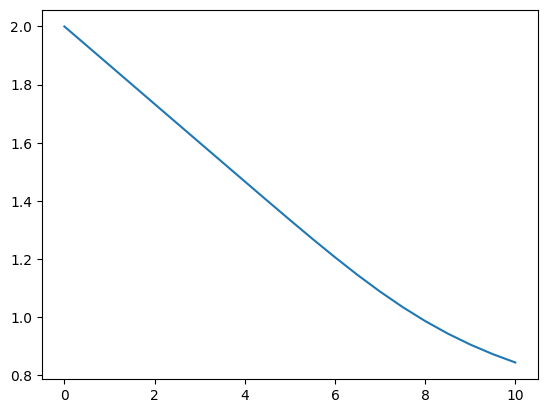

In [ ]:
fig, ax1 = plt.subplots()
line = ax1.plot(t_vec, meanconc)
print('Final value:', meanconc[-1])

Text(0.5, 1.0, 'concentration')

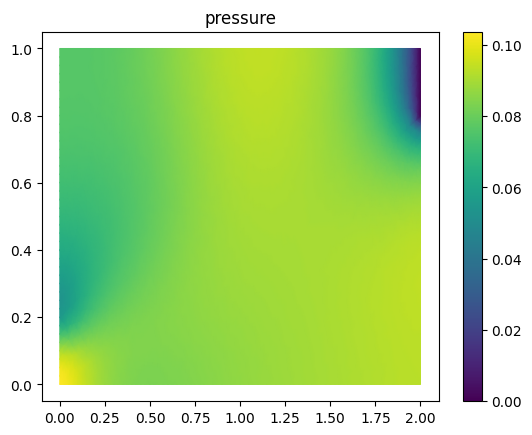

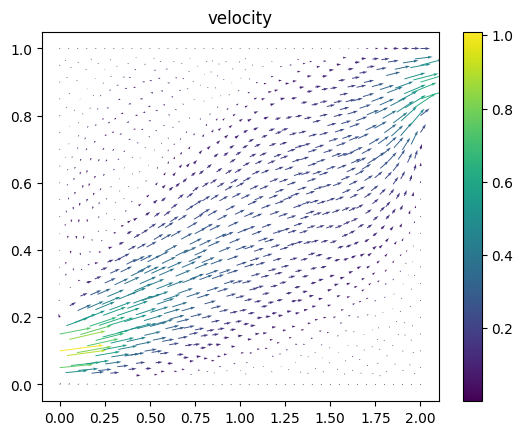

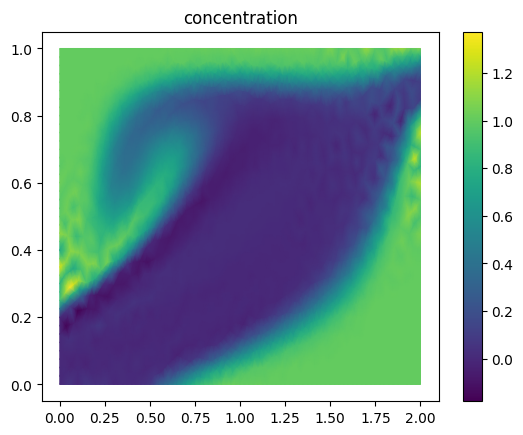

In [ ]:
fig, ax = plt.subplots()
col = tripcolor(dph, axes=ax)
plt.colorbar(col)
plt.title('pressure')
fig, ax = plt.subplots()
col = quiver(uh, axes=ax)
plt.colorbar(col)
plt.title('velocity')
fig, ax = plt.subplots()
col = tripcolor(ch, axes=ax)
plt.colorbar(col)
plt.title('concentration')